### Import libraries

In [95]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import dataframe

In [96]:
current_data_structure = pd.read_csv('/Users/adolfomytr/Documents/Data Science/SBTi/SBTi_Companies_Taking_Action.csv', encoding='latin1')
current_data_structure.head()

,Company Name,ISIN,LEI,Near term - Target Status,Near term - Target Classification,Near term - Target Year,Long term - Target Status,Long term - Target Classification,Long term - Target Year,Net-Zero Committed,...,Organization Type,BA1.5,BA1.5 Date,Location,Region,Sector,Date,Target,Target Classification,Extension
0,(ACIP) Alexandria Company for Industrial Packages,NaN,NaN,Targets Set,Well-below 2¡C,2030,NaN,NaN,NaN,No,...,Small or Medium Enterprise,No,NaN,Egypt,Africa,Containers and Packaging,01/02/2022,This target was approved using a streamlined t...,The targets covering greenhouse gas emissions ...,NaN
1,2degrees,NaN,72450039D2LOPG0Z2I07,Committed,NaN,NaN,NaN,NaN,NaN,No,...,Company,No,NaN,New Zealand,Oceania,Telecommunication Services,01/09/2021,NaN,NaN,NaN
2,3B-Fibreglass,NaN,529900UNERQOV61CA912,Committed,NaN,NaN,NaN,NaN,NaN,Yes,...,Company,Yes,01/09/2021,Belgium,Europe,"Consumer Durables, Household and Personal Prod...",01/10/2021,NaN,NaN,NaN
3,4most,NaN,NaN,Targets Set,Well-below 2¡C,2030,NaN,NaN,NaN,No,...,Small or Medium Enterprise,No,NaN,United Kingdom (UK),Europe,Professional Services,01/09/2022,This target was approved using a streamlined t...,The targets covering greenhouse gas emissions ...,NaN
4,A&L Goodbody,NaN,NaN,Committed,NaN,NaN,NaN,NaN,NaN,No,...,Company,No,NaN,Ireland,Europe,Professional Services,01/10/2021,NaN,NaN,NaN


### Check out datatypes in case we need to change one, for calculation or structure purposes

In [97]:
current_data_structure.dtypes  #All of them are objects (or strings), but there are dates that we should change into date format
current_data_structure['Date'] = pd.to_datetime(current_data_structure['Date'], dayfirst=True)
current_data_structure['BA1.5 Date']= pd.to_datetime(current_data_structure['BA1.5 Date'], dayfirst=True)
print(current_data_structure.dtypes)

Company Name                                 object
ISIN                                         object
LEI                                          object
Near term - Target Status                    object
Near term - Target Classification            object
Near term - Target Year                      object
Long term - Target Status                    object
Long term - Target Classification            object
Long term - Target Year                      object
Net-Zero Committed                           object
Net-Zero Year                                object
Organization Type                            object
BA1.5                                        object
BA1.5 Date                           datetime64[ns]
Location                                     object
Region                                       object
Sector                                       object
Date                                 datetime64[ns]
Target                                       object
Target Class

### From the current data structure, check out which colums have missing values that will go to the new data structure

In [98]:
new_data_missing_values = current_data_structure[current_data_structure['ISIN'].isnull() |
                                                current_data_structure['LEI'].isnull() |
                                                current_data_structure['Location'].isnull() |
                                                current_data_structure['Region'].isnull() |
                                                current_data_structure['Sector'].isnull() | 
                                                current_data_structure['Organization Type'].isnull() |
                                                current_data_structure['Target'].isnull() |
                                                current_data_structure['Near term - Target Classification'].isnull() |
                                                current_data_structure['Near term - Target Year'].isnull() |
                                                current_data_structure['Date'].isnull()]


### Dataframe with all missing values 

In [99]:
new_data_missing_values = new_data_missing_values[['Company Name', 
                                                    'ISIN', 
                                                    'LEI', 
                                                    'Location', 
                                                    'Region', 
                                                    'Sector', 
                                                    'Organization Type', 
                                                    'Target', 
                                                    'Near term - Target Classification', 
                                                    'Near term - Target Year', 
                                                    'Date']]
print(new_data_missing_values)

                                           Company Name          ISIN  \
0     (ACIP) Alexandria Company for Industrial Packages           NaN   
1                                              2degrees           NaN   
2                                         3B-Fibreglass           NaN   
3                                                 4most           NaN   
4                                          A&L Goodbody           NaN   
...                                                 ...           ...   
3937                                      ZS Associates           NaN   
3938                          ZTO Express (Cayman) Inc.  US98980A1051   
3939                                     Zuellig Pharma           NaN   
3940                                       Zhlke Group           NaN   
3941                         Zurich Insurance Group Ltd  CH0011075394   

                       LEI                        Location         Region  \
0                      NaN                    

### Summary dataframe with number of missing values per category

In [100]:
new_data_missing_values_summary = pd.DataFrame(new_data_missing_values.count())
new_data_missing_values_summary['missing_values'] = new_data_missing_values['Company Name'].count() - new_data_missing_values_summary[0]
new_data_missing_values_summary = new_data_missing_values_summary['missing_values']
new_data_missing_values_summary = pd.DataFrame(new_data_missing_values_summary)
new_data_missing_values_summary = new_data_missing_values_summary[new_data_missing_values_summary['missing_values'] > 0]
print(new_data_missing_values_summary)

                                   missing_values
ISIN                                         2082
LEI                                          1638
Region                                          3
Target                                       2058
Near term - Target Classification            2056
Near term - Target Year                      2116
Date                                           22


### Check if there are any whole duplicated rows

In [101]:
current_data_structure[current_data_structure.duplicated() == True]

,Company Name,ISIN,LEI,Near term - Target Status,Near term - Target Classification,Near term - Target Year,Long term - Target Status,Long term - Target Classification,Long term - Target Year,Net-Zero Committed,...,Organization Type,BA1.5,BA1.5 Date,Location,Region,Sector,Date,Target,Target Classification,Extension


### Check if there are any duplicated company names

In [102]:
company_duplicates = current_data_structure[current_data_structure.duplicated(subset='Company Name') == True]
company_duplicates = company_duplicates['Company Name']
print(company_duplicates)

606                           CANPACK Group
1644         Hongkong Land Holdings Limited
2239              MEANINGS CAPITAL PARTNERS
3649    United Microelectronics Corporation
Name: Company Name, dtype: object


### Check if there are any duplicated ISIN

In [103]:
ISIN_duplicates = current_data_structure[current_data_structure.duplicated(subset='ISIN', keep=False) == True & current_data_structure['ISIN'].notnull()]
ISIN_duplicates = ISIN_duplicates[['Company Name', 'ISIN']]
ISIN_duplicates = ISIN_duplicates.merge(current_data_structure, on='ISIN')
ISIN_duplicates = ISIN_duplicates[['ISIN', 'Company Name_x']].drop_duplicates()
print(ISIN_duplicates)

               ISIN                            Company Name_x
0      NL0000303709                      Aegon Nederland N.V.
2      NL0000303709              Watches of Switzerland Group
4      FR0000031122                    Air France - KLM Group
6      FR0000031122                          Air France Group
8      ES0105022000                      Applus Services, S.A
10     ES0105022000                            Webuild S.p.A.
12     GB00BN7CG237  Aston Martin Lagonda Global Holdings PLC
14     GB00BN7CG237                      Weir Group PLC (The)
16     AT0000APOST4                             Austrian Post
18     AT0000APOST4                   sterreichische Post AG
20    not available               BES Engineering Corporation
22    not available                       PunaMusta Media PLC
24     SE0015659834                                   BHC Ltd
26     SE0015659834                               RugVista AB
28     NO0010657505                             Borregaard AS
30     N

### Check if there are any duplicated LEI

In [104]:
LEI_duplicates = current_data_structure[current_data_structure.duplicated(subset='LEI', keep=False) == True & current_data_structure['LEI'].notnull()]
LEI_duplicates = LEI_duplicates[['Company Name', 'LEI']]
LEI_duplicates = LEI_duplicates.merge(current_data_structure, on='LEI')
LEI_duplicates = LEI_duplicates[['LEI', 'Company Name_x']].drop_duplicates()
print(LEI_duplicates)

                      LEI                                     Company Name_x
0    5299000EAMGGBEYP7J33                                           AB Volvo
2    5299000EAMGGBEYP7J33                                    Volvo Car Group
4    969500CIV6V451G2DU77                                             AGRIAL
6    969500CIV6V451G2DU77                                             Agrial
8    969500AQW31GYO8JZD66                             Air France - KLM Group
10   969500AQW31GYO8JZD66                           KLM Royal Dutch Airlines
12   529900MVUWACNUTK8467                                      Austrian Post
14   529900MVUWACNUTK8467                            sterreichische Post AG
16   213800D1MJVOT6SNBX11                                      B2Holding ASA
18   213800D1MJVOT6SNBX11                                  Kindred Group plc
20   5493008SR6XZECH6BN71                                      BekaertDeslee
22   5493008SR6XZECH6BN71                                      NV Bekaert SA

### Import again dataframe for pt 2 excercise

In [105]:
current_data_structure = pd.read_csv('/Users/adolfomytr/Documents/Data Science/SBTi/SBTi_Companies_Taking_Action.csv', encoding='latin1')
print(current_data_structure.head())

                                        Company Name ISIN  \
0  (ACIP) Alexandria Company for Industrial Packages  NaN   
1                                           2degrees  NaN   
2                                      3B-Fibreglass  NaN   
3                                              4most  NaN   
4                                       A&L Goodbody  NaN   

                    LEI Near term - Target Status  \
0                   NaN               Targets Set   
1  72450039D2LOPG0Z2I07                 Committed   
2  529900UNERQOV61CA912                 Committed   
3                   NaN               Targets Set   
4                   NaN                 Committed   

  Near term - Target Classification Near term - Target Year  \
0                    Well-below 2¡C                    2030   
1                               NaN                     NaN   
2                               NaN                     NaN   
3                    Well-below 2¡C                    2030   

### Change date to datetype object

In [106]:
current_data_structure['Date'] = pd.to_datetime(current_data_structure['Date'], dayfirst=True)

### Restructure columns in order

In [107]:
new_data_structure = current_data_structure[['Company Name', 'ISIN', 'LEI', 'Location', 'Region', 'Sector', 'Organization Type', 'Target', 'Near term - Target Classification', 'Near term - Target Year', 'Date']]

### Rename columns with different names
Columns to rename: Target to Full target language, Near term - Target Classification to Temperature alignment, Near term - Target Year to Target year, Date to Date published

In [108]:
dict_rename = {'Target': 'Full target language',
                'Near term - Target Classification': 'Temperature alignment',
                'Near term - Target Year': 'Target year',
                'Date': 'Date published'}

new_data_structure.rename(columns=dict_rename, inplace=True)

/Users/adolfomytr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Add columns that are missing
Columns missing: Action, Target type, Target wording, Scope, Target ambition, Type, Target classification, Base year, Year type

In [109]:
new_data_structure[['Action', 'Target type', 'Target wording', 'Scope', 'Target ambition', 'Type', 'Target classification', 'Base year', 'Year type']] = np.nan

/Users/adolfomytr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-109-b636ca06cbf5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_structure[['Action', 'Target type', 'Target wording', 'Scope', 'Target ambition', 'Type', 'Target classification', 'Base year', 'Year type']] = np.nan
/Users/adolfomytr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 

### Reorder all columns with final structure

In [110]:
new_data_structure = new_data_structure[['Company Name', 'ISIN', 'LEI', 'Location', 'Region', 'Sector', 'Organization Type', 'Action', 'Full target language', 'Temperature alignment', 'Target type', 'Target wording', 'Scope', 'Target ambition', 'Type', 'Target classification', 'Base year', 'Target year', 'Year type', 'Date published']]
new_data_structure.head()

,Company Name,ISIN,LEI,Location,Region,Sector,Organization Type,Action,Full target language,Temperature alignment,Target type,Target wording,Scope,Target ambition,Type,Target classification,Base year,Target year,Year type,Date published
0,(ACIP) Alexandria Company for Industrial Packages,NaN,NaN,Egypt,Africa,Containers and Packaging,Small or Medium Enterprise,NaN,This target was approved using a streamlined t...,Well-below 2¡C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2030,NaN,2022-02-01
1,2degrees,NaN,72450039D2LOPG0Z2I07,New Zealand,Oceania,Telecommunication Services,Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-01
2,3B-Fibreglass,NaN,529900UNERQOV61CA912,Belgium,Europe,"Consumer Durables, Household and Personal Prod...",Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-01
3,4most,NaN,NaN,United Kingdom (UK),Europe,Professional Services,Small or Medium Enterprise,NaN,This target was approved using a streamlined t...,Well-below 2¡C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2030,NaN,2022-09-01
4,A&L Goodbody,NaN,NaN,Ireland,Europe,Professional Services,Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-01


### Import new datasets for pt 3 exercise

In [111]:
task_3_indexes_table = pd.read_csv('/Users/adolfomytr/Documents/Data Science/SBTi/SBTi_Technical_Task.csv', encoding='latin1')
companies_taking_action_table = pd.read_csv('/Users/adolfomytr/Documents/Data Science/SBTi/SBTi_Companies_Taking_Action.csv', encoding='latin1')
companies_with_indexes = companies_taking_action_table.merge(task_3_indexes_table, on='ISIN', how = 'left')

### Filter only United States Companies, because we are analizing S&P500

In [112]:
us_companies_with_indexes = companies_with_indexes[['Company Name_x', 'ISIN', 'Index', 'Location', 'Target']]
us_companies_with_indexes = us_companies_with_indexes[us_companies_with_indexes['Location'] == 'United States of America (USA)']
print(us_companies_with_indexes.head())

        Company Name_x          ISIN    Index                        Location  \
23              Abbott  US0028241000  S&P 500  United States of America (USA)   
24              AbbVie  US00287Y1091  S&P 500  United States of America (USA)   
28  ABM Industries Inc  US0009571003      NaN  United States of America (USA)   
32      Abt Associates           NaN      NaN  United States of America (USA)   
50                ACRE           NaN      NaN  United States of America (USA)   

                                               Target  
23  Abbott commits to reduce absolute scope 1 and ...  
24                                                NaN  
28                                                NaN  
32  Abt Associates commits to reduce absolute scop...  
50                                                NaN  


### Eliminate ISIN empty values and filter only the S&P500 companies (consider that there are many empty values for the ISIN that might mean more companies for the current year)

In [113]:
us_companies_with_indexes_with_isin = us_companies_with_indexes[us_companies_with_indexes['ISIN'].notnull()]
sp500_companies_cy = us_companies_with_indexes_with_isin[us_companies_with_indexes_with_isin['Index'] == 'S&P 500']
#sp500_companies_cy.head()
count_sp500_companies_cy = sp500_companies_cy['Company Name_x'].count()
print(count_sp500_companies_cy)

186


### Count number of companies with commitment and approved in companies with indexes from task_3 table

In [114]:
sp500_task_3 = task_3_indexes_table[task_3_indexes_table['Index'] == 'S&P 500']
count_approved_sp500 = sp500_task_3['SBT Approved'].count()
count_commited_sp500 = sp500_task_3['SBT Committed'].count()
count_total_sp500 = count_approved_sp500 + count_commited_sp500
print(count_approved_sp500)
print(count_commited_sp500)
print(count_total_sp500)

80
40
120


### Create dictionary with new data for representation

  Companies   PY   CY
0     Total  120  186


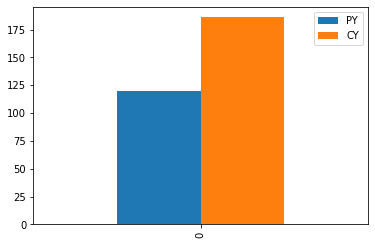

In [115]:
dict_py_cy = {'Companies':'Total', 'PY':[count_total_sp500], 'CY':[count_sp500_companies_cy]} 
py_vs_cy_table = pd.DataFrame(dict_py_cy)
growth_perc = py_vs_cy_table['CY']/py_vs_cy_table['PY'] - 1
growth_count = py_vs_cy_table['CY'] - py_vs_cy_table['PY']
print(py_vs_cy_table)
#Plot previous year vs current year
py_vs_cy_table.plot(kind='bar')
plt.show()

### Plot distribution of companies approved vs commited

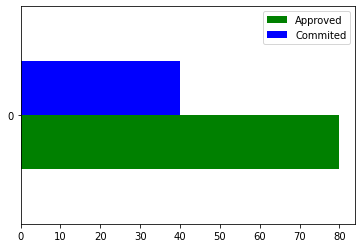

In [116]:
dict_approved_commited = {'Distribution': 'S&P 500 PY', 'Approved': [count_approved_sp500], 'Commited': [count_commited_sp500]}
approved_vs_commited_table = pd.DataFrame(dict_approved_commited)
approved_vs_commited_table.plot(kind = 'barh', color = ['green', 'blue'])
plt.show()